In [10]:
import pandas as pd
import numpy as np
import pickle
from time import time

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

# Train/Test Split

In [2]:
df = pd.read_csv('data/application_train_pca.csv')
df.head()

,sk_id_curr,target,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,34,35,36,37
0,100002,1,0.311091,-1.332634,-0.399883,-2.000222,0.390812,0.672156,-0.191782,1.242912,...,0.094919,0.108869,-0.097447,0.207195,1.110724,-0.885310,0.271509,0.201748,0.078745,-1.013988
1,100003,0,1.003885,2.295670,-0.859131,-1.410614,0.350578,-0.441695,1.138504,-0.655109,...,0.215964,0.051572,0.488226,-0.041404,-0.785569,1.252293,1.370241,-0.178892,-0.732245,0.653229
2,100004,0,-0.356299,-2.745839,0.603927,-0.145268,2.845680,-0.206305,-1.628813,-0.740097,...,-0.140227,0.215135,-0.424872,0.097197,0.123388,0.143478,0.539556,0.226337,-0.640607,-1.492682
3,100006,0,-0.452229,-0.706371,-1.026894,-1.142946,-0.490824,-0.542183,-0.185623,0.939177,...,0.015248,-0.032642,-0.234938,-0.217559,0.080454,-0.554469,-0.494474,0.734851,-0.315487,0.781315
4,100007,0,0.396743,-0.732436,2.179659,-0.024886,1.154158,2.721180,-2.287210,0.657978,...,0.434943,0.120781,-0.307910,-0.718415,-0.035805,-1.283724,0.026249,0.483156,2.127985,-0.200012


In [3]:
train = df[df.columns[2:]]
target = df['target']

# Modeling

In [23]:
def model_fit(model, train, target, timed=True, feature_importance=False):
    '''
    This function is for checking performance of a single model. 
    
    Optional plot of feature importance for ensemble methods.
    '''
    # Fit and Predict
    if timed:
        start = time()
        passed = time() - start
        print(f'Seconds to start: {passed:.2f}')
    model.fit(train, target)
    if timed:
        passed = time() - start
        print(f'Seconds to fit: {passed:.2f}')
    
    # CV
    cv_score = cross_validation.cross_val_score(model, train, target, cv=5, scoring='roc_auc')
    print(f'CV Score : Mean - {np.mean(cv_score):.3f} | Std - {np.std(cv_score):.3f} | Min - {np.min(cv_score):.3f} | Max - {np.max(cv_score):.3f}')
    if timed:
        passed = time() - start
        print(f'Seconds to CV: {passed:.2f}')
    
    # Plots feature importance, for ensemble models only
    if feature_importance:
        feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Seconds to start: 0.00
Seconds to fit: 37.88
CV Score : Mean - 0.592 | Std - 0.002 | Min - 0.591 | Max - 0.595
Seconds to CV: 175.27


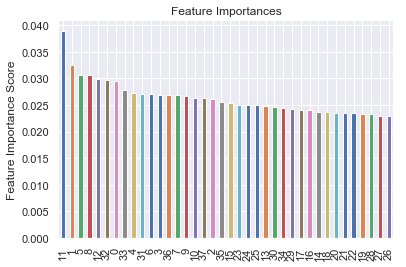

In [24]:
rfc = RandomForestClassifier(random_state=42)
model_fit(rfc, train, target, feature_importance=True)